<a href="https://colab.research.google.com/github/BillJPG/Python_data_science_midterm/blob/main/MidtermNAJA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://opendata.umea.se/explore/dataset/sammanstallning-maltidsservice/information/?disjunctive.omrade&disjunctive.verksamhet&disjunctive.typ_av_kok&disjunctive.enhet

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import time

In [ ]:
!pip install requests

In [ ]:
import requests
import pandas as pd
import time

url = "https://opendata.umea.se/api/explore/v2.1/catalog/datasets/sammanstallning-maltidsservice/records"

params = {
    "lang": "en",
    "timezone": "UTC",
    "include_links": "false",
    "include_app_metas": "false",
    "apikey": "ea7c59ad5b5f50d0606ee1e8cebb0914138212b26be8cd958303f9d4",
    "limit": 100,      # ดึงครั้งละ 100
    "offset": 0
}

all_rows = []
max_rows = 4000
delay_sec = 0.2

while True:
    remaining = max_rows - len(all_rows)
    if remaining <= 0:
        break
    params["limit"] = min(100, remaining)

    r = requests.get(url, params=params)
    r.raise_for_status()
    data = r.json()

    results = data.get("results", [])
    if not results:
        break

    all_rows.extend(results)
    print(f"Fetched {len(all_rows)}/{data.get('total_count','?')} rows")

    params["offset"] += params["limit"]
    time.sleep(delay_sec)

# แปลงเป็น DataFrame (ไม่ต้องมี id)
df = pd.json_normalize(all_rows)

# ถ้าอยากลบแถวซ้ำที่เหมือนกันทุกคอลัมน์ (ไม่บังคับ)
df = df.drop_duplicates()

print("rows saved:", len(df))
df.to_csv("meals.csv", index=False, encoding="utf-8-sig")
print("Saved to meals.csv")


Fetched 100/9051 rows
Fetched 200/9051 rows
Fetched 300/9051 rows
Fetched 400/9051 rows
Fetched 500/9051 rows
Fetched 600/9051 rows
Fetched 700/9051 rows
Fetched 800/9051 rows
Fetched 900/9051 rows
Fetched 1000/9051 rows
Fetched 1100/9051 rows
Fetched 1200/9051 rows
Fetched 1300/9051 rows
Fetched 1400/9051 rows
Fetched 1500/9051 rows
Fetched 1600/9051 rows
Fetched 1700/9051 rows
Fetched 1800/9051 rows
Fetched 1900/9051 rows
Fetched 2000/9051 rows
Fetched 2100/9051 rows
Fetched 2200/9051 rows
Fetched 2300/9051 rows
Fetched 2400/9051 rows
Fetched 2500/9051 rows
Fetched 2600/9051 rows
Fetched 2700/9051 rows
Fetched 2800/9051 rows
Fetched 2900/9051 rows
Fetched 3000/9051 rows
Fetched 3100/9051 rows
Fetched 3200/9051 rows
Fetched 3300/9051 rows
Fetched 3400/9051 rows
Fetched 3500/9051 rows
Fetched 3600/9051 rows
Fetched 3700/9051 rows
Fetched 3800/9051 rows
Fetched 3900/9051 rows
Fetched 4000/9051 rows
rows saved: 4000
Saved to meals.csv


In [ ]:
print(df.shape)
print(df.columns.tolist())
df.head(3)
df.isna().mean().sort_values(ascending=False).head(10)
df.isna().sum()


(4000, 25)
['period', 'omrade', 'enhet', 'typ_av_kok', 'verksamhet', 'totalt_antal_serverade_frukost', 'antal_lunch_hos_oss', 'antal_skickade_lunch', 'serverade_pedagogiska_luncher', 'antal_serverade_mellanmal', 'antal_middag_hos_oss', 'antal_skickade_middag', 'totalt_antal_portioner_exklusive_skick', 'totalt_antal_portioner_inklusive_skick', 'tillagnings_svinn_kg', 'serverings_svinn_kg', 'tallriks_svinn_kg', 'svinn_portion_g', 'personal_kostnad', 'livsmedels_kostnad', 'ovrig_kostnad', 'transport_kostand', 'total_kostnad_per_portion', 'ekologisk', 'ar']


,0
period,0
omrade,0
enhet,0
typ_av_kok,6
verksamhet,15
totalt_antal_serverade_frukost,49
antal_lunch_hos_oss,4
antal_skickade_lunch,36
serverade_pedagogiska_luncher,36
antal_serverade_mellanmal,17


In [ ]:
df.describe()

,totalt_antal_serverade_frukost,antal_lunch_hos_oss,antal_skickade_lunch,serverade_pedagogiska_luncher,antal_serverade_mellanmal,antal_middag_hos_oss,antal_skickade_middag,totalt_antal_portioner_exklusive_skick,totalt_antal_portioner_inklusive_skick,tillagnings_svinn_kg,serverings_svinn_kg,tallriks_svinn_kg,svinn_portion_g,personal_kostnad,livsmedels_kostnad,ovrig_kostnad,transport_kostand,total_kostnad_per_portion,ekologisk
count,3951.000000,3996.000000,3964.000000,3964.000000,3983.000000,3939.000000,3939.000000,3997.000000,3997.000000,3955.000000,3955.000000,3955.000000,3947.000000,3710.000000,3855.000000,3868.000000,3266.000000,3752.000000,3847.000000
mean,419.694153,1958.458176,536.428595,231.287286,745.995192,142.506147,23.112954,2673.953267,3228.430344,12.101899,22.675223,31.154474,20.627565,-33.227131,-17.532858,-0.741897,-0.911245,-55.536195,25.097993
std,519.580714,3027.175532,2236.398880,724.093923,1008.388631,1147.316597,343.615733,3783.889594,4976.287027,46.609021,47.829533,103.604862,40.535413,31.319971,19.012704,24.924187,4.156574,53.229304,10.654738
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-149.860385,-99.796530,-14.896797,-62.622629,-264.825726,0.000000
25%,86.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,373.500000,612.700000,0.000000,0.000000,0.000000,1.000000,-37.689994,-18.845331,-1.387604,0.000000,-59.326376,19.000000
50%,290.000000,1063.900000,0.000000,110.900000,462.000000,0.000000,0.000000,1652.500000,1747.000000,0.000000,7.528935,0.000000,12.000000,-23.733309,-11.962439,-0.546521,0.000000,-37.399486,24.348887
75%,610.000000,2081.125000,211.000000,287.000000,1110.000000,0.000000,0.000000,3062.500000,3302.500000,1.440000,25.487560,30.890000,29.000000,-15.989843,-7.515114,0.000000,0.000000,-26.879697,30.000000
max,5280.000000,26252.800000,27383.200000,12834.000000,6200.000000,19716.000000,12000.000000,39432.000000,46233.600000,941.000000,667.840000,4327.890000,1592.000000,154.291619,17.514201,1410.903333,1.842949,137.216086,100.000000


In [ ]:
df.head()

,period,omrade,enhet,typ_av_kok,verksamhet,totalt_antal_serverade_frukost,antal_lunch_hos_oss,antal_skickade_lunch,serverade_pedagogiska_luncher,antal_serverade_mellanmal,...,serverings_svinn_kg,tallriks_svinn_kg,svinn_portion_g,personal_kostnad,livsmedels_kostnad,ovrig_kostnad,transport_kostand,total_kostnad_per_portion,ekologisk,ar
0,2020-01,Norr 1,Bullmark,Mottagning,Skola,146.00,0.00,133.00,0.0,0.0,...,59.246496,45.1000,52.0,-141.803615,-60.706656,-4.223500,NaN,-206.733772,21.992382,2020
1,2020-01,Norr 1,Hissjö,Tillagning,Fsk,351.65,0.00,154.05,0.0,0.0,...,17.978262,15.6065,25.0,-137.669402,-53.912068,-3.210682,0.0,-194.792152,28.190327,2020
2,2020-01,Norr 1,Rödåsel,Tillagning,Skola,219.00,399.00,57.00,0.0,0.0,...,13.432925,2.6600,12.0,-59.657895,-22.436842,-1.296491,NaN,-83.391228,27.732437,2020
3,2020-01,Norr 3,Östra Ersboda,Produktion,Skola,93.60,741.65,323.70,0.0,0.0,...,25.295366,54.1840,65.0,-72.243340,-27.640704,-1.576447,0.0,-101.460490,18.768180,2020
4,2020-01,Norr 4,Haga prodkök,Produktion,Skola,288.75,24574.50,807.75,0.0,0.0,...,21.921735,200.2500,36.0,-15.217221,-8.869556,-0.657862,0.0,-24.744639,19.077297,2020


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   period                                  4000 non-null   object 
 1   omrade                                  4000 non-null   object 
 2   enhet                                   4000 non-null   object 
 3   typ_av_kok                              3994 non-null   object 
 4   verksamhet                              3985 non-null   object 
 5   totalt_antal_serverade_frukost          3951 non-null   float64
 6   antal_lunch_hos_oss                     3996 non-null   float64
 7   antal_skickade_lunch                    3964 non-null   float64
 8   serverade_pedagogiska_luncher           3964 non-null   float64
 9   antal_serverade_mellanmal               3983 non-null   float64
 10  antal_middag_hos_oss                    3939 non-null   floa

#Task for my team นะ
ทุกอย่างไล่ลำดับว่าต้องทำอันไหนก่อน ถ้าโค้ดไหนต้องใช้ต่อในเซลล์อื่นเขียนอธิบายให้ชาวบ้านด้วย
แต่ละข้อมูลลิตส์ไว้หมดแล้วว่า argument ไหนใช้ต่อ ไปป์ไลน์ตามนี้

##EDA PIPE LINE

1) Column cleaning & rename (ทำอันแรก ไม่งั้นทำอันอื่นไม่ได้)
- ทำความสะอาดคอลั่มและเปลี่ยนชื่อ ตอนนี้ชื้อยังเป็นภาษาสวีเดนอยู่ เปลี่ยนชื่อคอลัมทั้งหมด

2) Type casting
- ยังไม่เห็นปัญหาของ type ในข้อมูล อาจจะยังไม่ต้องทำ
- (หมายเหตุ) ลองเช็คดูว่ามี type ไหนที่เอามาคำนวณไม่ได้ไหม type ที่คำนวนได้ส่วนใหญ่เป็น numeric

3) Handling missing value
- จัดการ Nan ในข้อมูล ถ้าสัดส่วน Nan น้อยให้ดรอป ถ้า nan มากและมีผลต่อข้อมูลลองหาวิธี แล้วทิ้งcomment ไว้ว่าทำไมใช้วิธีนั้น

4) Descriptive
- อย่างแรกลองทำตารางคร่าวๆเพื่อรู้จักข้อมูลก่อน ทำตารางแยก ตัวเลข กับ หมวดหมู่
เช่น
ตัวเลข : หา percentile outlier และการกระจุกตัว
หมวดหมู่ : แสดงค่า top 10 ของ food waste
- การอธิบายข้อมูลแบบนี้มีประโยชน์ต่อการทำ hypothesis test มากๆ **แนะนำว่าห้ามข้าม**

5) Visualization (คร่าวๆ)
- Box plot
- scatter plot
- Histplot

ทีนี้ที่เหลือจะเป็นการพิสูจน์ hypothesis เดี๋ยวมาจัดการวันหลัง

##DEAD LINE ขออนุญาติกำหนดเป็นพฤหัสนี้!!!
(หมายเหตุ หากไม่ว่างหรือต้องการขยาย Deadline โปรดติดต่อข้าพเจ้า)


                                      
                                      
                                      
                                      

---


                                                ด้วยรักและแฮมซ่า
                                                    บิว 🥰

###Rename column
ถ้าใช้โค้ดไหนเขียนต่อ ใช้ดาต้าเฟรมข้างล่าง


In [ ]:
#sorry, idk after runs this why the columns name not change so i used the code below(yim)
df = df.rename(columns={'omrade':'District'})
df = df.rename(columns={'enhet':'Unit'})
df = df.rename(columns={'totalt_antal_serverade_frukost':'Total_number_of_breakfasts_served'})
df = df.rename(columns={'antal_lunch_hos_oss':'Number_of_lunch_served_by_us'})
df = df.rename(columns={'antal_skickade_lunch':'Number_of_lunches_sent'})
df = df.rename(columns={'serverade_pedagogiska_luncher':'Served_pedagogical_lunches'})
df = df.rename(columns={'antal_serverade_mellanmal':'Number_of_snacks_served'})
df = df.rename(columns={'antal_middag_hos_oss':'Number_of_dinners_served_by_us'})
df = df.rename(columns={'antal_skickade_middag':'Number_of_dinners_sent'})
df = df.rename(columns={'totalt_antal_portioner_exklusive_skick':'Total_number_of_portions_excluding_sent'})
df = df.rename(columns={'totalt_antal_portioner_inklusive_skick':'Total_number_of_portions_including_sent'})
df = df.rename(columns={'tillagnings_svinn_kg':'Preparation_waste_kg'})
df = df.rename(columns={'serverings_svinn_kg':'Serving_waste_kg'})
df = df.rename(columns={'tallriks_svinn_kg':'Plate_waste_kg'})
df = df.rename(columns={'svinn_portion_g':'Waste_per_portion_g'})
df = df.rename(columns={'personal_kostnad':'Personnel_cost'})
df = df.rename(columns={'livsmedels_kostnad':'Food_cost'})
df = df.rename(columns={'ovrig_kostnad':'Other_cost'})
df = df.rename(columns={'transport_kostand':'Transport_cost'})
df = df.rename(columns={'total_kostnad_per_portion':'Total_cost_per_portion'})
df = df.rename(columns={'ekologisk':'Ecological'})
df = df.rename(columns={'ar':'Year'})
df = df.rename(columns={'typ_av_kok':'Kitchen_type'})
df = df.rename(columns={'verksamhet':'Activity'})

In [ ]:
df.head(10)

,period,District,Unit,Kitchen_type,Activity,Total_number_of_breakfasts_served,Number_of_lunch_served_by_us,Number_of_lunches_sent,Served_pedagogical_lunches,Number_of_snacks_served,...,Serving_waste_kg,Plate_waste_kg,Waste_per_portion_g,Personnel_cost,Food_cost,Other_cost,Transport_cost,Total_cost_per_portion,Ecological,Year
0,2020-01,Norr 1,Bullmark,Mottagning,Skola,146.00,0.00,133.00,0.0,0.0,...,59.246496,45.1000,52.0,-141.803615,-60.706656,-4.223500,NaN,-206.733772,21.992382,2020
1,2020-01,Norr 1,Hissjö,Tillagning,Fsk,351.65,0.00,154.05,0.0,0.0,...,17.978262,15.6065,25.0,-137.669402,-53.912068,-3.210682,0.0,-194.792152,28.190327,2020
2,2020-01,Norr 1,Rödåsel,Tillagning,Skola,219.00,399.00,57.00,0.0,0.0,...,13.432925,2.6600,12.0,-59.657895,-22.436842,-1.296491,NaN,-83.391228,27.732437,2020
3,2020-01,Norr 3,Östra Ersboda,Produktion,Skola,93.60,741.65,323.70,0.0,0.0,...,25.295366,54.1840,65.0,-72.243340,-27.640704,-1.576447,0.0,-101.460490,18.768180,2020
4,2020-01,Norr 4,Haga prodkök,Produktion,Skola,288.75,24574.50,807.75,0.0,0.0,...,21.921735,200.2500,36.0,-15.217221,-8.869556,-0.657862,0.0,-24.744639,19.077297,2020
5,2020-01,Norr 4,Mariehem skola,Mottagning,Skola,62.00,0.00,0.00,0.0,0.0,...,15.338521,26.4000,20.0,NaN,NaN,NaN,0.0,NaN,28.521913,2020
6,2020-01,Väst 2,Grubbe,Tillagning,Fsk,0.00,0.00,0.00,0.0,0.0,...,0.000000,5.9500,50.0,0.000000,0.000000,0.000000,0.0,0.000000,22.741138,2020
7,2020-01,Väst 2,Kungsgården,Tillagning,Fsk,983.00,2259.00,0.00,447.0,1394.0,...,13.600000,0.0000,20.0,-20.337056,-10.144743,0.000000,NaN,-30.481798,36.438552,2020
8,2020-01,Väst 2,Linnean,Tillagning,Fsk,788.00,1426.00,0.00,179.0,1324.0,...,12.000000,0.0000,21.0,-24.861805,-14.681708,0.000000,NaN,-39.543513,32.185778,2020
9,2020-01,Öst 1,Maja Beskow,Tillagning,Skola,0.00,156.00,13.60,0.0,0.0,...,5.949534,98.7280,30.0,NaN,NaN,NaN,0.0,NaN,7.804283,2020


In [ ]:
df = df.rename(columns={
    'omrade': 'District',
    'enhet': 'Unit',
    'totalt_antal_serverade_frukost': 'Total_number_of_breakfasts_served',
    'antal_lunch_hos_oss': 'Number_of_lunch_served_by_us',
    'antal_skickade_lunch': 'Number_of_lunches_sent', 'serverade_pedagogiska_luncher': 'Served_pedagogical_lunches', 'antal_serverade_mellanmal': 'Number_of_snacks_served',
    'antal_middag_hos_oss': 'Number_of_dinners_served_by_us', 'antal_skickade_middag': 'Number_of_dinners_sent',
    'totalt_antal_portioner_exklusive_skick': 'Total_number_of_portions_excluding_sent',
    'totalt_antal_portioner_inklusive_skick': 'Total_number_of_portions_including_sent',
    'tillagnings_svinn_kg': 'Preparation_waste_kg',
    'serverings_svinn_kg': 'Serving_waste_kg', 'tallriks_svinn_kg': 'Plate_waste_kg', 'svinn_portion_g': 'Waste_per_portion_g',
    'personal_kostnad': 'Personnel_cost', 'livsmedels_kostnad': 'Food_cost', 'ovrig_kostnad': 'Other_cost',
    'transport_kostand': 'Transport_cost', 'total_kostnad_per_portion': 'Total_cost_per_portion', 'ekologisk': 'Ecological',
    'ar': 'Year', 'typ_av_kok': 'Kitchen_type', 'verksamhet': 'Activity'
})


In [ ]:
df.isnull().sum()

,0
period,0
District,0
Unit,0
Kitchen_type,6
Activity,15
Total_number_of_breakfasts_served,49
Number_of_lunch_served_by_us,4
Number_of_lunches_sent,36
Served_pedagogical_lunches,36
Number_of_snacks_served,17


In [ ]:
df['Activity'].unique()


array(['Skola', 'Fsk', 'Gymn', 'VO', None, 'Personalrest'], dtype=object)

In [ ]:
df["Food_cost"].describe()

,Food_cost
count,3855.000000
mean,-17.532858
std,19.012704
min,-99.796530
25%,-18.845331
50%,-11.962439
75%,-7.515114
max,17.514201


In [ ]:

df.dropna(
    subset=[
        'Kitchen_type', 'Activity', 'Total_number_of_breakfasts_served', 'Number_of_lunch_served_by_us',
        'Number_of_lunches_sent',
        'Served_pedagogical_lunches', 'Number_of_snacks_served', 'Number_of_dinners_served_by_us',
        'Number_of_dinners_sent',
        'Total_number_of_portions_excluding_sent', 'Total_number_of_portions_including_sent',
        'Preparation_waste_kg', 'Serving_waste_kg',
        'Plate_waste_kg', 'Waste_per_portion_g', 'Food_cost', 'Other_cost', 'Ecological',
        'Total_cost_per_portion'], inplace=True )


In [ ]:
df.isnull().sum()

,0
period,0
District,0
Unit,0
Kitchen_type,0
Activity,0
Total_number_of_breakfasts_served,0
Number_of_lunch_served_by_us,0
Number_of_lunches_sent,0
Served_pedagogical_lunches,0
Number_of_snacks_served,0


In [ ]:
df.shape

###Esus

(3566, 25)

In [ ]:
df["Food_cost"].describe()

,Food_cost
count,3566.000000
mean,-16.502742
std,16.839267
min,-99.796530
25%,-17.979429
50%,-11.900432
75%,-7.735154
max,17.514201


In [ ]:
df['Transport_cost'].unique()

array([         nan,   0.        , -29.165997  ,  -2.04228075,
        -1.77758831,  -1.74967721,  -3.56467195,  -2.32679837,
        -0.43175554,  -5.18944385,  -4.83670749,  -0.41264075,
        -0.81788102,  -1.34467323,  -0.9323718 ,  -3.1633726 ,
        -0.87594858,  -1.9793662 ,  -1.20994144, -20.41942045,
        -3.13538333,  -1.98147846,  -1.61780682,  -0.53402506,
        -1.03277778,  -5.63340622,  -3.46950602,  -1.17590628,
        -2.56911532,  -2.15640923,  -2.04886277,  -1.48943312,
       -20.11546362,  -2.97945455,  -1.85039522,  -0.47138338,
        -5.00815451,  -3.36555392,  -1.28713781,  -2.52692654,
        -0.52564404,  -1.21848458, -17.68007905, -29.85831081,
        -2.84991304,  -1.64318171,  -1.44872123,  -3.59252823,
        -1.39334426,  -0.65341047,  -2.59102229,  -4.23527757,
        -5.07608563,  -1.30053022,  -2.88153235,  -1.67299422,
        -2.37758078,  -2.1839726 ,  -2.18011943,  -2.7168995 ,
        -7.52636269,  -2.5319363 ,  -0.91062271,  -7.00

In [ ]:
df['Personnel_cost'].unique()

array([-141.80361545, -137.66940247,  -59.65789474, ..., -107.22554871,
        -45.96285528,  -25.58109689])

In [ ]:
df['Transport_cost'].describe()

,Transport_cost
count,3004.000000
mean,-0.890606
std,4.017828
min,-62.622629
25%,0.000000
50%,0.000000
75%,0.000000
max,1.842949


In [ ]:
df["Transport_cost"].fillna(df["Transport_cost"].mean(), inplace = True)


/tmp/ipython-input-1615203651.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Transport_cost"].fillna(df["Transport_cost"].mean(), inplace = True)


In [ ]:
df['Transport_cost'].describe()

,Transport_cost
count,3566.000000
mean,-0.890606
std,3.687561
min,-62.622629
25%,-0.890606
50%,0.000000
75%,0.000000
max,1.842949


In [ ]:
df["Personnel_cost"].fillna(df["Personnel_cost"].mean(), inplace = True)

/tmp/ipython-input-1191669059.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Personnel_cost"].fillna(df["Personnel_cost"].mean(), inplace = True)


In [ ]:
df.isnull().sum()

,0
period,0
District,0
Unit,0
Kitchen_type,0
Activity,0
Total_number_of_breakfasts_served,0
Number_of_lunch_served_by_us,0
Number_of_lunches_sent,0
Served_pedagogical_lunches,0
Number_of_snacks_served,0


array([[<Axes: title={'center': 'Total_number_of_breakfasts_served'}>,
        <Axes: title={'center': 'Number_of_lunch_served_by_us'}>,
        <Axes: title={'center': 'Number_of_lunches_sent'}>,
        <Axes: title={'center': 'Served_pedagogical_lunches'}>],
       [<Axes: title={'center': 'Number_of_snacks_served'}>,
        <Axes: title={'center': 'Number_of_dinners_served_by_us'}>,
        <Axes: title={'center': 'Number_of_dinners_sent'}>,
        <Axes: title={'center': 'Total_number_of_portions_excluding_sent'}>],
       [<Axes: title={'center': 'Total_number_of_portions_including_sent'}>,
        <Axes: title={'center': 'Preparation_waste_kg'}>,
        <Axes: title={'center': 'Serving_waste_kg'}>,
        <Axes: title={'center': 'Plate_waste_kg'}>],
       [<Axes: title={'center': 'Waste_per_portion_g'}>,
        <Axes: title={'center': 'Personnel_cost'}>,
        <Axes: title={'center': 'Food_cost'}>,
        <Axes: title={'center': 'Other_cost'}>],
       [<Axes: title={'c

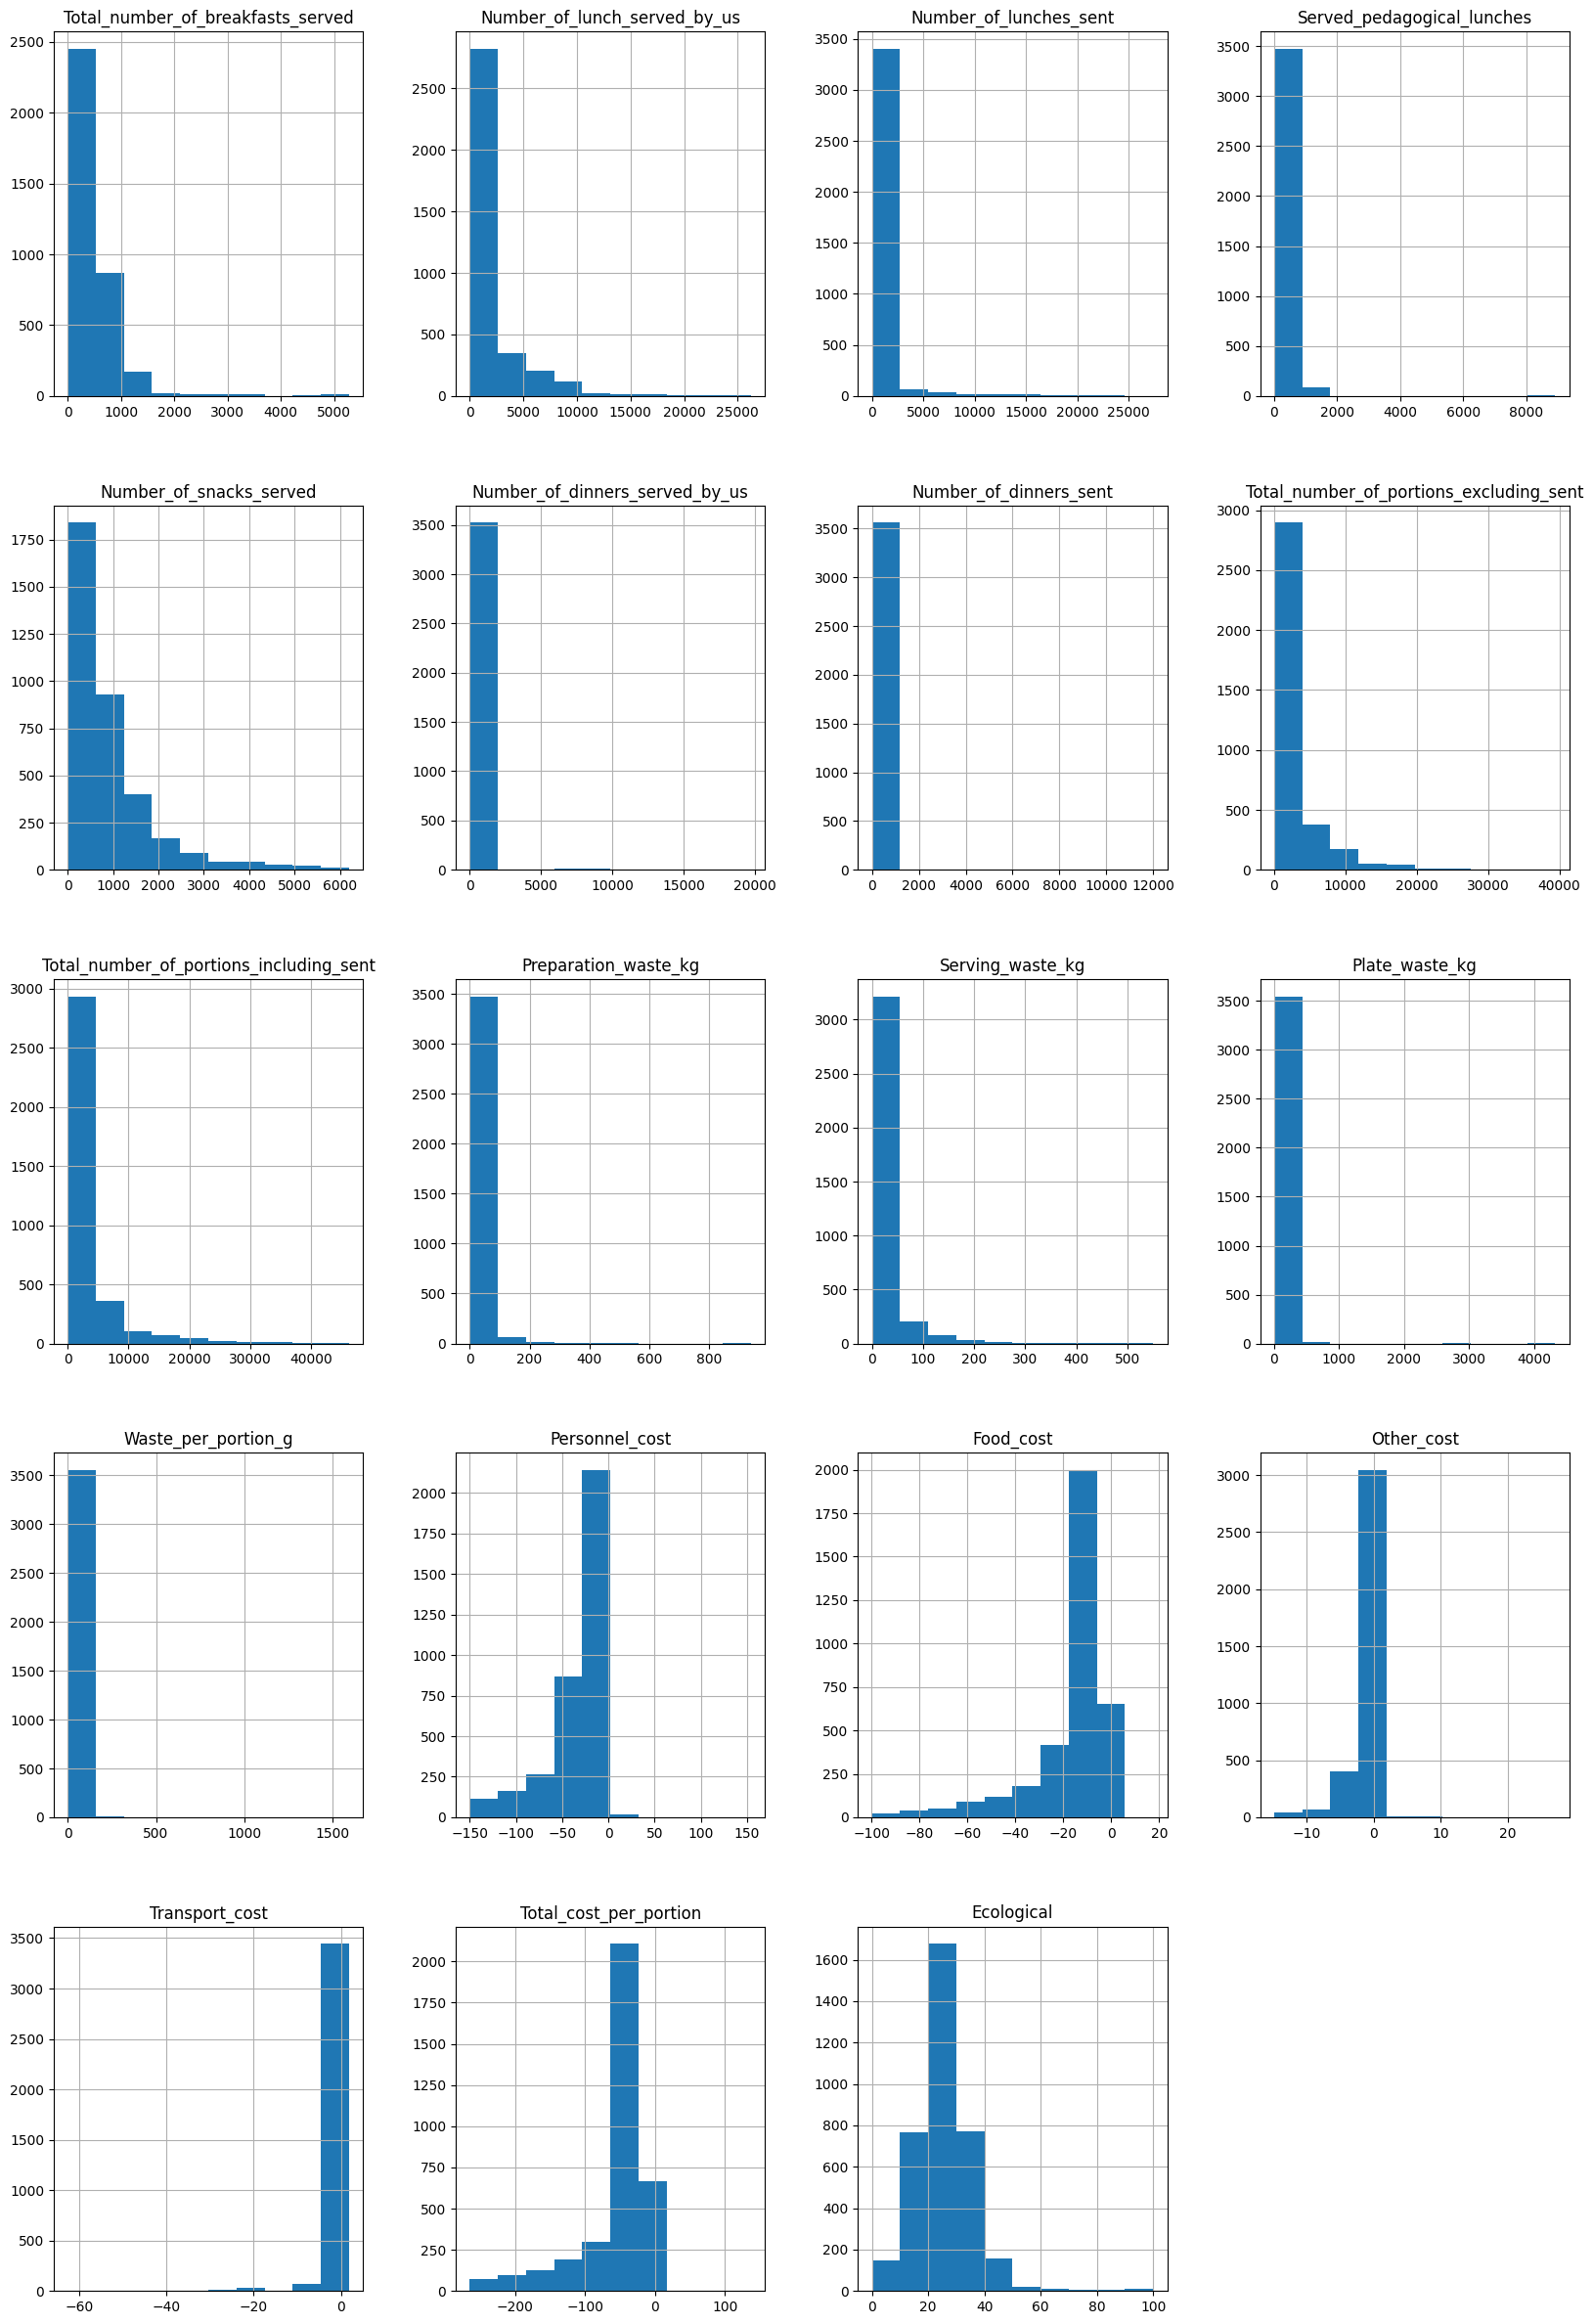

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
df.hist(figsize=(20,30))


###Hypothesis Test
ไฮโปเรามีอะไรมั่งนะ


R: How does reducing the ingredient cost contribute to sustainability?

xxx H1 : Using less organic food will reduce the ingredient cost.  xxx

H1 : high ecological concern lead to low food waste, which will effect ingredient cost


R2: Activity and operation which refer to the age of the consumer have an effect on food waste.

H1: Schools have leftover food less than other Institution.

H2: the more snacks served between meals, the more there will be leftover food.




H3: Number of lucnch have effect on ...

In [ ]:
df["Total_waste_kg"] = df["Preparation_waste_kg"] + df["Serving_waste_kg"] + df["Plate_waste_kg"]

np.float64(-0.06277757143803715)

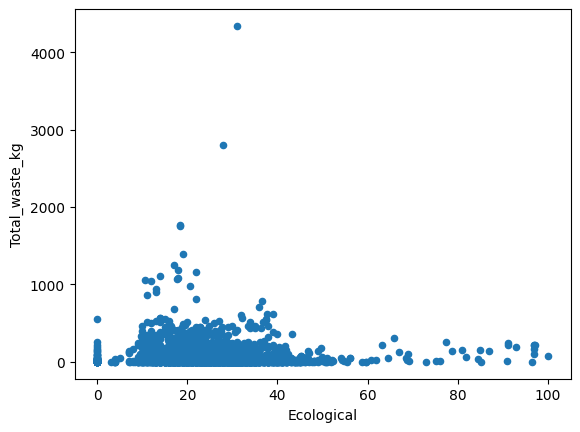

In [ ]:
df.plot.scatter('Ecological', 'Total_waste_kg')
df.Ecological.corr(df.Total_waste_kg)

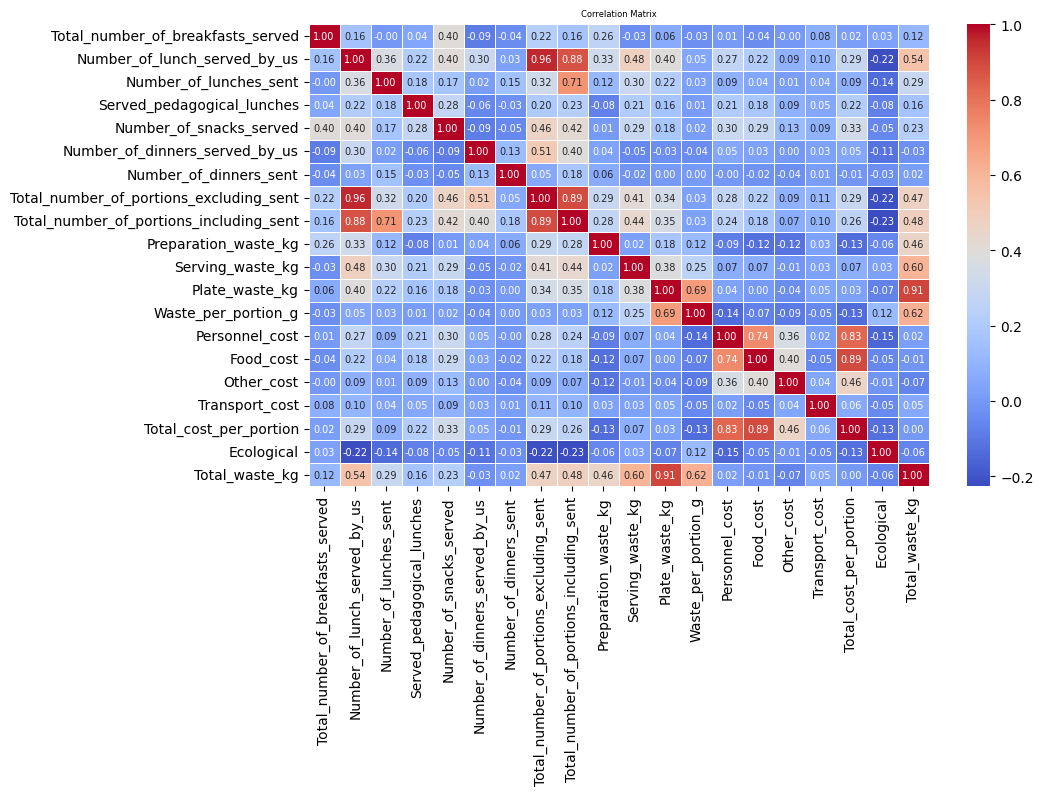

In [ ]:
df2 = df.drop(columns=['period'])
correlation_matrix = df2.corr(numeric_only=True)
correlation_matrix

plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 7})
plt.title("Correlation Matrix", fontsize=6)
plt.show()

Correlation between 'Total_waste_kg' and 'Total_number_of_breakfasts_served': 0.11754614352244978


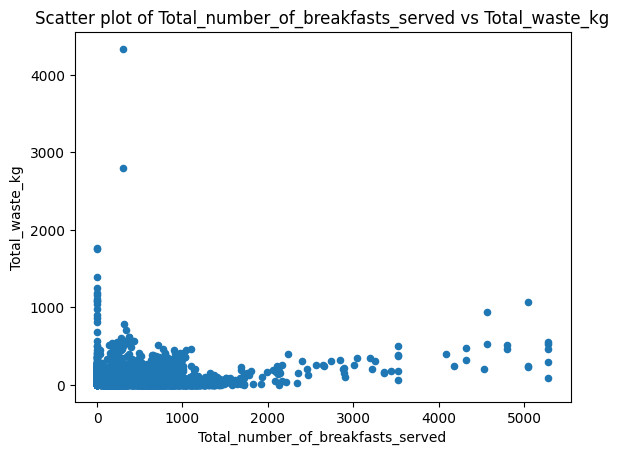

Correlation between 'Total_waste_kg' and 'Number_of_lunch_served_by_us': 0.5449732070687036


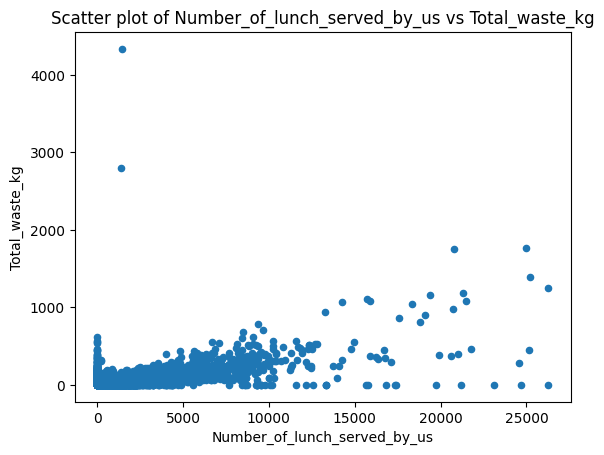

Correlation between 'Total_waste_kg' and 'Number_of_lunches_sent': 0.29283751720928897


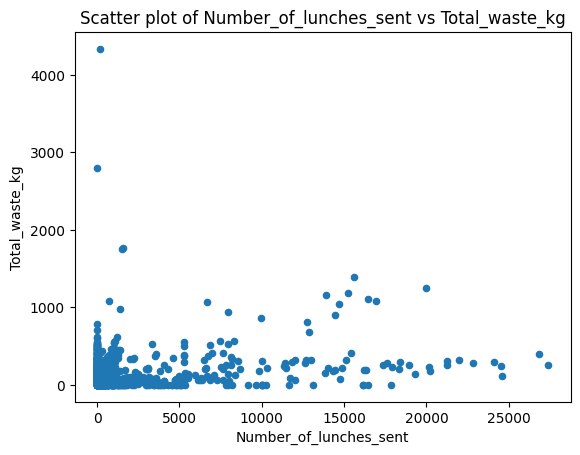

Correlation between 'Total_waste_kg' and 'Served_pedagogical_lunches': 0.16227123765702375


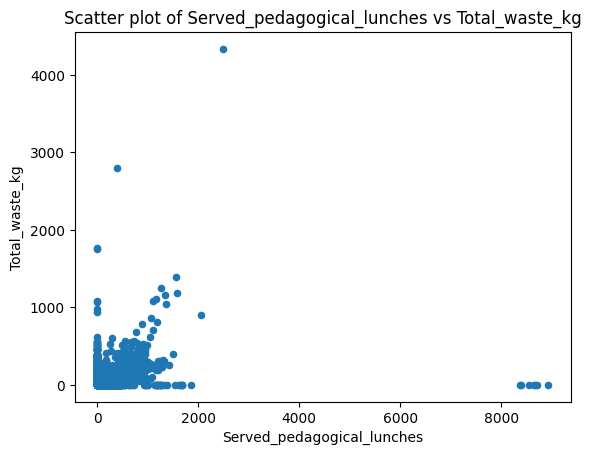

Correlation between 'Total_waste_kg' and 'Number_of_snacks_served': 0.22590437439425567


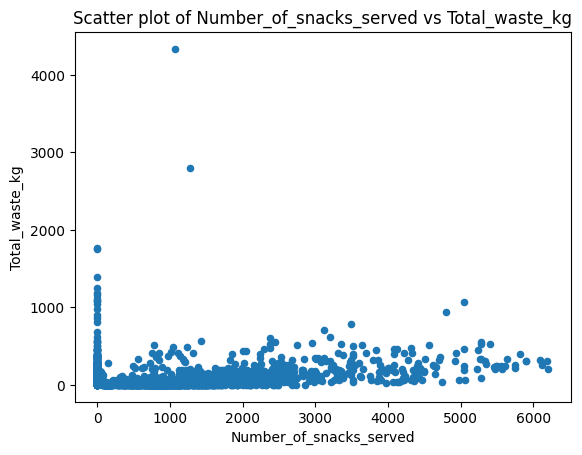

Correlation between 'Total_waste_kg' and 'Number_of_dinners_served_by_us': -0.029185231567038665


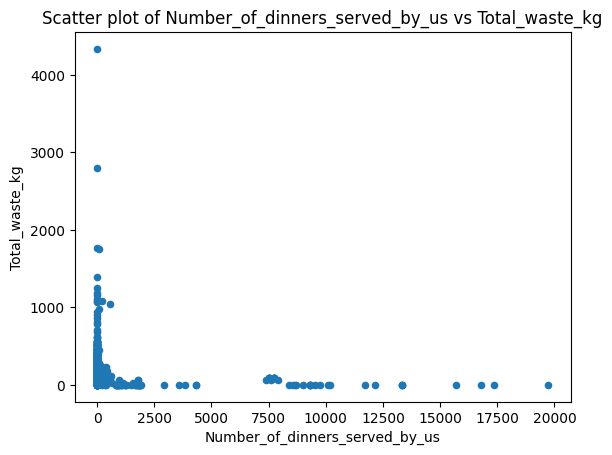

Correlation between 'Total_waste_kg' and 'Number_of_dinners_sent': 0.018336922070369462


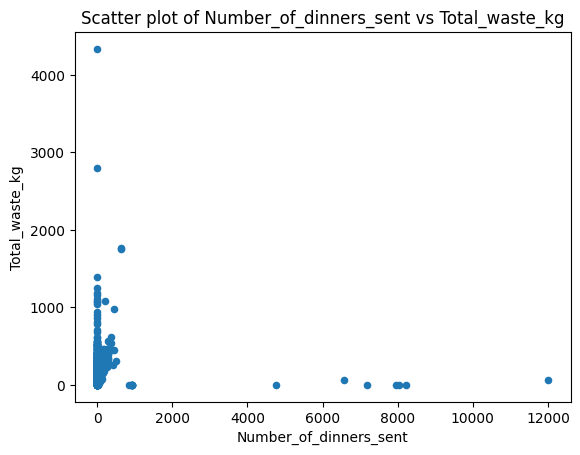

Correlation between 'Total_waste_kg' and 'Total_number_of_portions_excluding_sent': 0.46968187040289094


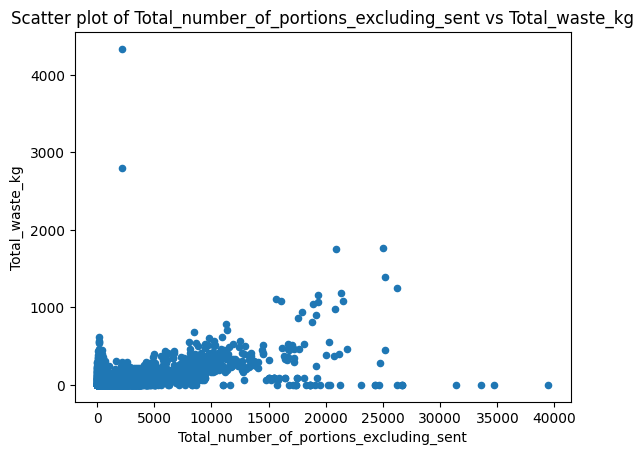

Correlation between 'Total_waste_kg' and 'Total_number_of_portions_including_sent': 0.4839917555414391


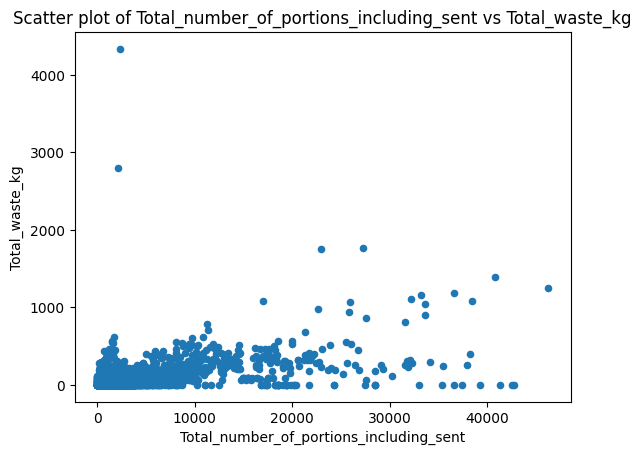

Correlation between 'Total_waste_kg' and 'Preparation_waste_kg': 0.45509333176152234


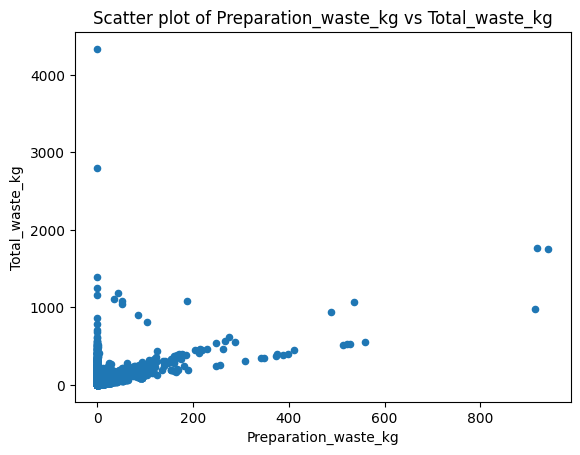

Correlation between 'Total_waste_kg' and 'Serving_waste_kg': 0.6021908453382957


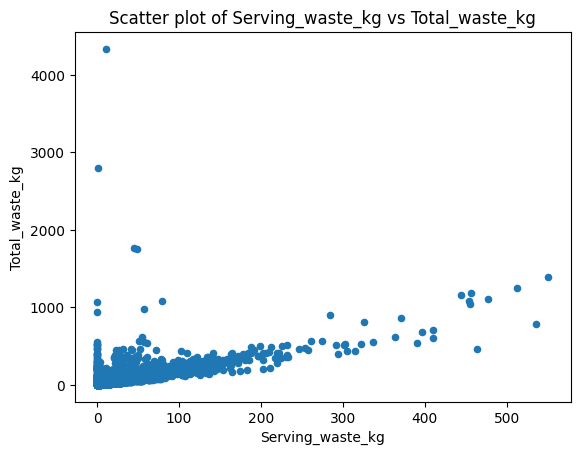

Correlation between 'Total_waste_kg' and 'Plate_waste_kg': 0.9084348397428607


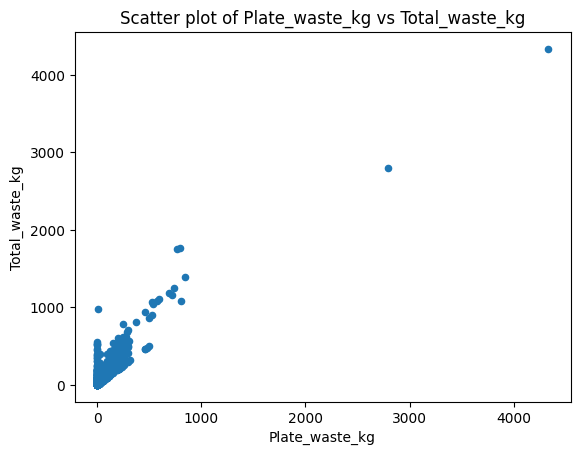

Correlation between 'Total_waste_kg' and 'Waste_per_portion_g': 0.6207352050835744


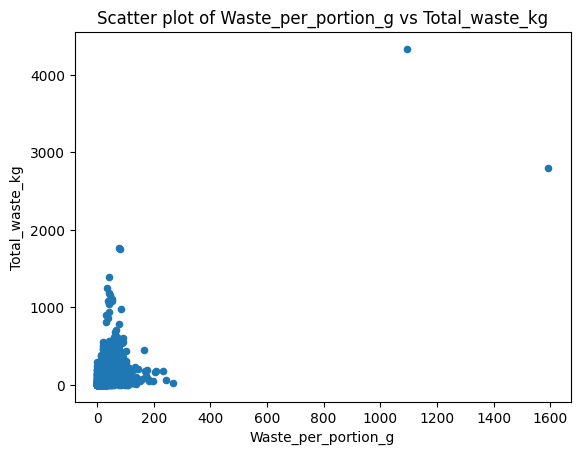

Correlation between 'Total_waste_kg' and 'Personnel_cost': 0.02140909580916166


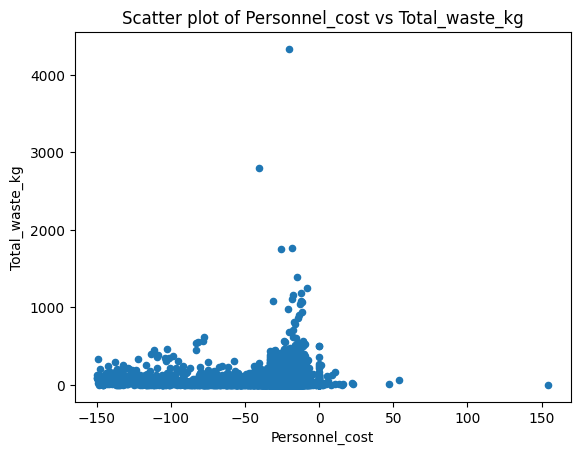

Correlation between 'Total_waste_kg' and 'Food_cost': -0.013629810356680748


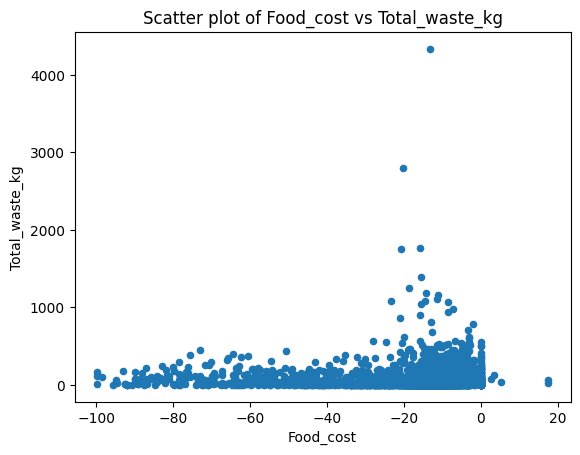

Correlation between 'Total_waste_kg' and 'Other_cost': -0.06873091043320528


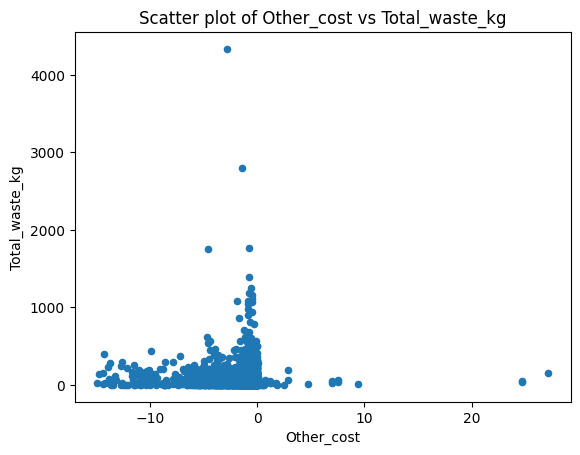

Correlation between 'Total_waste_kg' and 'Transport_cost': 0.05283499804530243


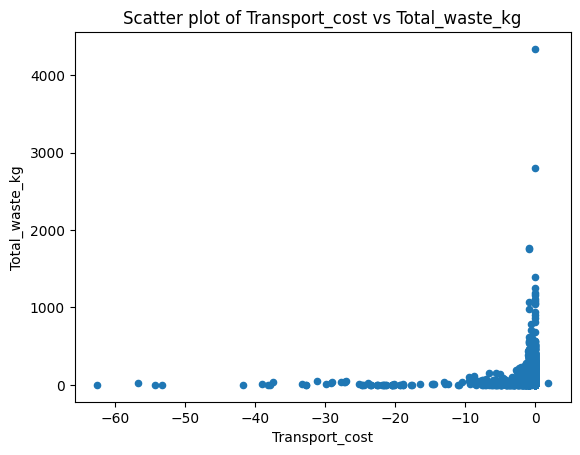

Correlation between 'Total_waste_kg' and 'Total_cost_per_portion': 0.002318075437270853


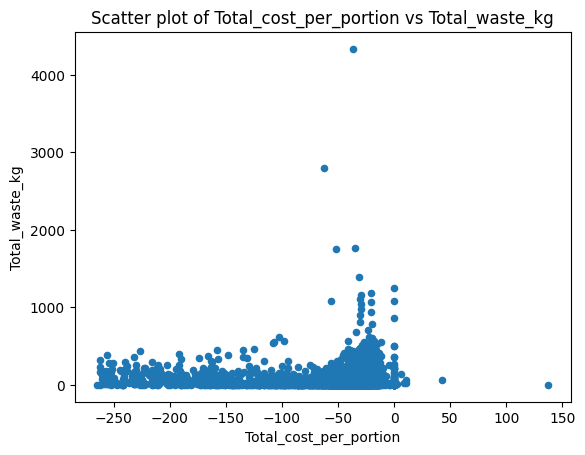

Correlation between 'Total_waste_kg' and 'Ecological': -0.06277757143803715


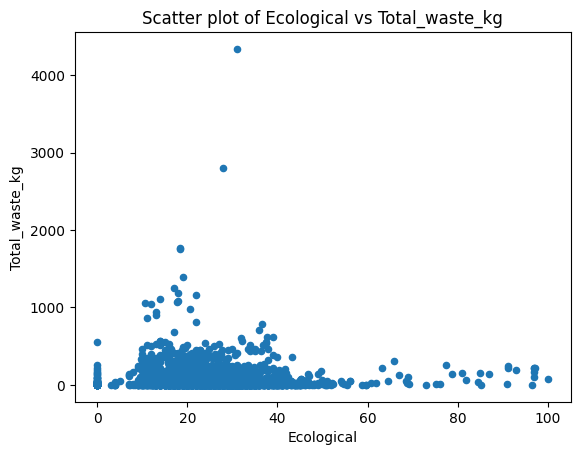

In [ ]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
if 'Total_waste_kg' in numerical_cols:
    numerical_cols.remove('Total_waste_kg')

for column in numerical_cols:
    correlation = df['Total_waste_kg'].corr(df[column])
    print(f"Correlation between 'Total_waste_kg' and '{column}': {correlation}")

    df.plot.scatter(column, 'Total_waste_kg')
    plt.title(f"Scatter plot of {column} vs Total_waste_kg")
    plt.show()

In [ ]:

from scipy.stats import pearsonr
r, p_value = pearsonr(df['Ecological'], df['Total_waste_kg'])

print(f"Pearson r: {r:.4f}")
print(f"P-value  : {p_value:.6f}")

Pearson r: -0.0628
P-value  : 0.000176


In [ ]:
import statsmodels.api as sm

X = sm.add_constant(df['Ecological'])
y = df['Total_waste_kg']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Total_waste_kg   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     14.10
Date:                Wed, 15 Oct 2025   Prob (F-statistic):           0.000176
Time:                        12:59:55   Log-Likelihood:                -22850.
No. Observations:                3566   AIC:                         4.570e+04
Df Residuals:                    3564   BIC:                         4.572e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         86.7591      6.410     13.536      0.0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3566 entries, 0 to 3999
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   period                                   3566 non-null   object 
 1   District                                 3566 non-null   object 
 2   Unit                                     3566 non-null   object 
 3   Kitchen_type                             3566 non-null   object 
 4   Activity                                 3566 non-null   object 
 5   Total_number_of_breakfasts_served        3566 non-null   float64
 6   Number_of_lunch_served_by_us             3566 non-null   float64
 7   Number_of_lunches_sent                   3566 non-null   float64
 8   Served_pedagogical_lunches               3566 non-null   float64
 9   Number_of_snacks_served                  3566 non-null   float64
 10  Number_of_dinners_served_by_us           3566 non-nul

In [ ]:
import scipy.stats as stats

school = df[df["Activity"]=="Skola"]["Total_waste_kg"]
others = df[df["Activity"]!="Skola"]["Total_waste_kg"]

stat, p_value = stats.ttest_ind(school, others, alternative="less")
print(stat, p_value)

17.59680109905625 1.0


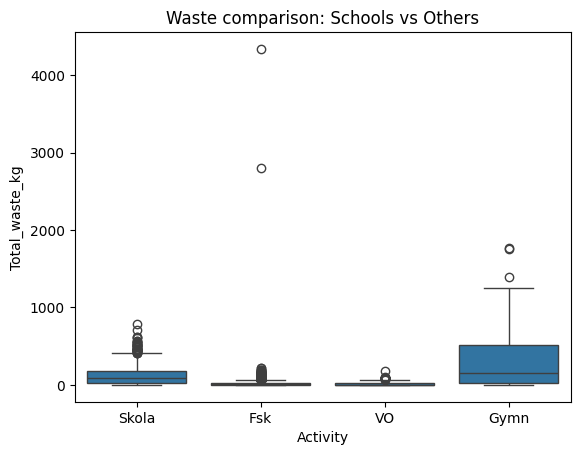

In [ ]:
sns.boxplot(x="Activity", y="Total_waste_kg", data=df)
plt.title("Waste comparison: Schools vs Others")
plt.show()

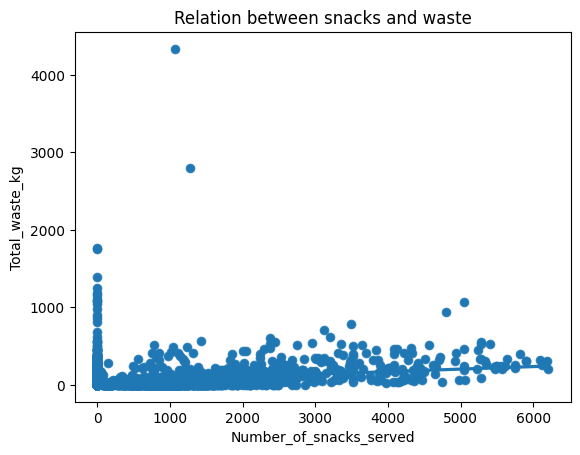

In [ ]:
sns.scatterplot(data = df, x = "Number_of_snacks_served", y = "Total_waste_kg")
plt.title("Relation between snacks and waste")
sns.regplot(data = df, x = "Number_of_snacks_served", y = "Total_waste_kg")
plt.show()

In [ ]:
df['Number_of_snacks_served'].corr(df['Total_waste_kg'])

np.float64(0.22590437439425565)

In [ ]:
from scipy.stats import pearsonr
r, p_value = pearsonr(df['Number_of_snacks_served'], df['Total_waste_kg'])

print(f"Pearson r: {r:.4f}")
print(f"P-value  : {p_value:.6f}")

Pearson r: 0.2259
P-value  : 0.000000


In [ ]:
import statsmodels.api as sm

X = sm.add_constant(df['Number_of_snacks_served'])
y = df['Total_waste_kg']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Total_waste_kg   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     191.7
Date:                Wed, 15 Oct 2025   Prob (F-statistic):           1.70e-42
Time:                        12:59:57   Log-Likelihood:                -22764.
No. Observations:                3566   AIC:                         4.553e+04
Df Residuals:                    3564   BIC:                         4.554e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [ ]:
from sklearn.ensemble import RandomForestRegressor

X = pd.get_dummies(df.drop(columns=['Number_of_snacks_served']), drop_first=True)
y = df['Number_of_snacks_served']

rf = RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances.head(15))



Total_number_of_portions_excluding_sent    0.516291
Total_number_of_breakfasts_served          0.152443
Served_pedagogical_lunches                 0.091031
Number_of_lunch_served_by_us               0.040226
Transport_cost                             0.039144
Personnel_cost                             0.022049
Number_of_dinners_sent                     0.012053
Preparation_waste_kg                       0.011079
District_Syd 1                             0.010686
Total_number_of_portions_including_sent    0.008790
Total_cost_per_portion                     0.006992
Unit_Hörnefors                             0.006314
Plate_waste_kg                             0.005564
Unit_Sofiehem                              0.004408
Unit_Sandvik fsk                           0.004270
dtype: float64


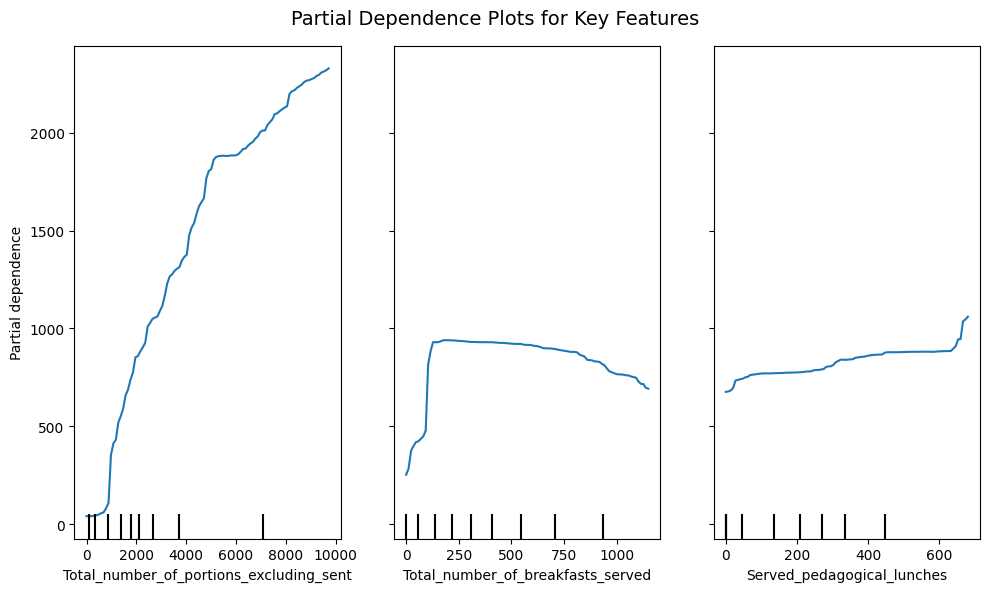

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

features_to_plot = [
    'Total_number_of_portions_excluding_sent',
    'Total_number_of_breakfasts_served',
    'Served_pedagogical_lunches'
]

fig, ax = plt.subplots(figsize=(10,6))
PartialDependenceDisplay.from_estimator(rf, X, features_to_plot, ax=ax)
plt.suptitle("Partial Dependence Plots for Key Features", fontsize=14)
plt.tight_layout()
plt.show()


H3
H₀: Breakfast consumption has no significant effect on lunch consumption or food waste.

H1: Breakfast consumption has a significant negative relationship with lunch consumption and a positive relationship with food waste.


(People who eat more breakfast will consume less lunch, leading to more food waste.)

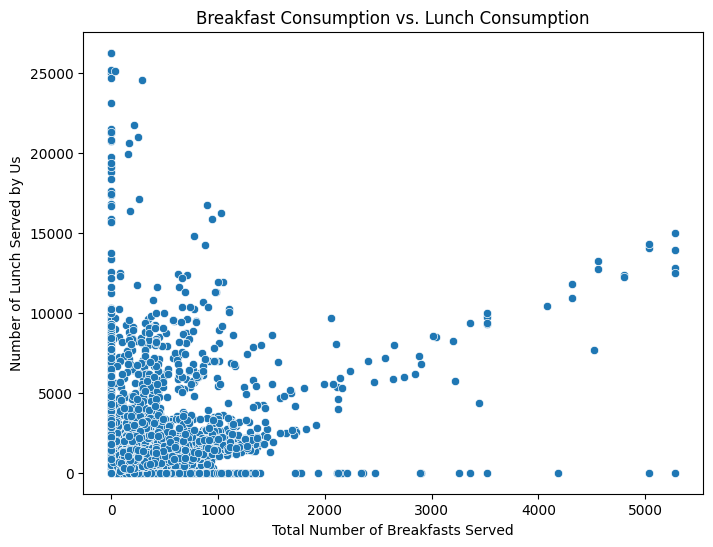

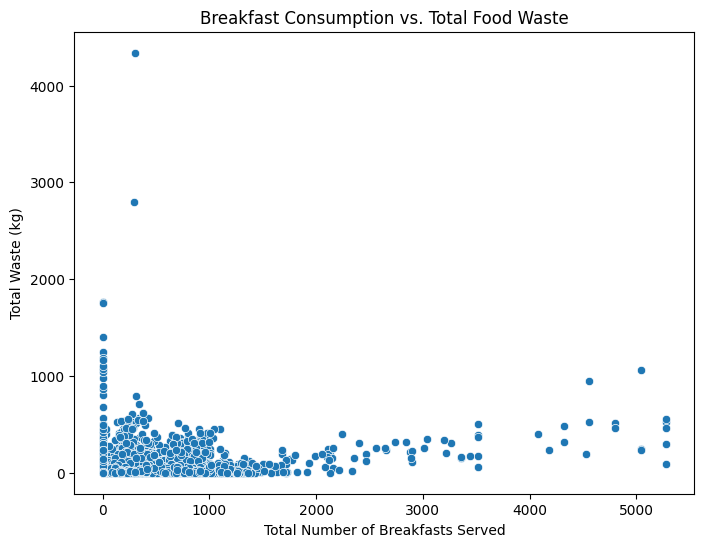

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Total_number_of_breakfasts_served', y='Number_of_lunch_served_by_us')
plt.title('Breakfast Consumption vs. Lunch Consumption')
plt.xlabel('Total Number of Breakfasts Served')
plt.ylabel('Number of Lunch Served by Us')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Total_number_of_breakfasts_served', y='Total_waste_kg')
plt.title('Breakfast Consumption vs. Total Food Waste')
plt.xlabel('Total Number of Breakfasts Served')
plt.ylabel('Total Waste (kg)')
plt.show()

In [ ]:
r1, p1 = pearsonr(df['Total_number_of_breakfasts_served'], df['Number_of_lunch_served_by_us'])

r2, p2 = pearsonr(df['Total_number_of_breakfasts_served'], df['Total_waste_kg'])

print(f"Breakfast vs Lunch: r={r1:.3f}, p={p1:.4f}")
print(f"Breakfast vs Waste: r={r2:.3f}, p={p2:.4f}")

Breakfast vs Lunch: r=0.158, p=0.0000
Breakfast vs Waste: r=0.118, p=0.0000


In [ ]:
X1 = sm.add_constant(df['Total_number_of_breakfasts_served'])
model1 = sm.OLS(df['Number_of_lunch_served_by_us'], X1).fit()
print(model1.summary())


X2 = sm.add_constant(df['Total_number_of_breakfasts_served'])
model2 = sm.OLS(df['Total_waste_kg'], X2).fit()
print(model2.summary())

                                 OLS Regression Results                                 
Dep. Variable:     Number_of_lunch_served_by_us   R-squared:                       0.025
Model:                                      OLS   Adj. R-squared:                  0.025
Method:                           Least Squares   F-statistic:                     91.07
Date:                          Wed, 15 Oct 2025   Prob (F-statistic):           2.49e-21
Time:                                  13:00:27   Log-Likelihood:                -33583.
No. Observations:                          3566   AIC:                         6.717e+04
Df Residuals:                              3564   BIC:                         6.718e+04
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
--------

In [ ]:
X = sm.add_constant(df[['Total_number_of_breakfasts_served', 'Number_of_lunch_served_by_us']])
model = sm.OLS(df['Total_waste_kg'], X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Total_waste_kg   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     756.3
Date:                Wed, 15 Oct 2025   Prob (F-statistic):          1.71e-274
Time:                        13:00:27   Log-Likelihood:                -22226.
No. Observations:                3566   AIC:                         4.446e+04
Df Residuals:                    3563   BIC:                         4.448e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 